### Notebook for the inference of cell-cell communications on cardiomyocytes data using `LIANA+`

- **Developed by**: Carlos Talavera-López
- **Würzburg Institute for Systems Immunology, Faculty of Medicine, Julius-Maximilian-Universität Würzburg**
- **Created**: 240131
- **Latest version**: 240131

### Import required modules

In [1]:
import anndata
import numpy as np
import liana as li
import pandas as pd
import scanpy as sc

from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.2.0
asttokens           NA
cffi                1.16.0
colorama            0.4.6
comm                0.2.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
dill                0.3.8
docrep              0.3.2
exceptiongroup      1.1.3
executing           2.0.1
h5py                3.10.0
ipykernel           6.26.0
ipywidgets          8.1.1
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
liana               1.0.4
llvmlite            0.41.1
matplotlib          3.8.2
mizani              0.9.3
mpl_toolkits        NA
mudata              0.2.3
natsort             8.4.0
numba               0.58.1
numpy               1.26.3
packaging           23.2
pandas              2.2.0
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
platformdirs        4.2.0
plotnine            0.12.4
prompt_toolkit 

### Read in data

In [3]:
adata = sc.read_h5ad('../../../data/heart_mm_nuclei-23-0092_CMC_states_ctl240131.raw.h5ad') 
adata

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Check `LIANA+` available methods

In [4]:
li.mt.show_methods()

Method Name Magnitude Score Specificity Score  \
0        CellPhoneDB        lr_means   cellphone_pvals   
0         Connectome       expr_prod     scaled_weight   
0             log2FC            None          lr_logfc   
0              NATMI       expr_prod       spec_weight   
0  SingleCellSignalR         lrscore              None   
0           CellChat        lr_probs    cellchat_pvals   
0     Rank_Aggregate  magnitude_rank  specificity_rank   
0     Geometric Mean       lr_gmeans       gmean_pvals   

                                           Reference  
0  Efremova, M., Vento-Tormo, M., Teichmann, S.A....  
0  Raredon, M.S.B., Yang, J., Garritano, J., Wang...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  Hou, R., Denisenko, E., Ong, H.T., Ramilowski,...  
0  Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ...  
0  Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  CellPhoneDBv2's permutation approach applied t...

### Run `cellphoneDB` for trial

In [5]:
cellphonedb(adata, groupby = 'C_scANVI', 
            expr_prop = 0.1, 
            resource_name = 'mouseconsensus', 
            verbose = True, 
            key_added = 'cpdb_res',
            use_raw = False)
adata.uns['cpdb_res'].head()

Using `.X`!
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
8059 features of mat are empty, they will be removed.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 8257 samples and 24226 features


100%|██████████| 1000/1000 [00:01<00:00, 550.98it/s]


ligand ligand_complex  ligand_means  ligand_props receptor  \
1025   Fgf13          Fgf13      8.533807      0.985012    Fgfr2   
1523  S100a1         S100a1      5.382082      0.727630     Ryr2   
273    Fgf13          Fgf13      8.533807      0.985012    Fgfr2   
1046   Fgf13          Fgf13      8.533807      0.985012    Scn5a   
603   S100a1         S100a1      5.382082      0.727630     Ryr2   

     receptor_complex  receptor_means  receptor_props source target  lr_means  \
1025            Fgfr2        7.053463        0.982572   vCM2   vCM2  7.793634   
1523             Ryr2        9.705669        0.994075   vCM4   vCM2  7.543876   
273             Fgfr2        6.324462        0.854738   vCM2   vCM1  7.429134   
1046            Scn5a        6.045417        0.922621   vCM2   vCM2  7.289612   
603              Ryr2        9.192567        0.967069   vCM4   vCM1  7.287324   

      cellphone_pvals  
1025              0.0  
1523              0.0  
273               0.0  
1046              0.0  
603               0.0

In [6]:
adata.obs['C_scANVI'].cat.categories

Index(['vCM1', 'vCM2', 'vCM3', 'vCM4'], dtype='object')

### Visualise `cellphoneDB` interactions using a dotplot

In [10]:
li.pl.dotplot(adata = adata,
              colour = 'lr_means',
              size = 'cellphone_pvals',
              inverse_size = True, 
              source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              figure_size = (30, 50),
              filter_fun = lambda x: x['cellphone_pvals'] <= 0.05,
              uns_key = 'cpdb_res',
              cmap = 'magma'
             )

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


<Figure Size: (3000 x 5000)>

/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


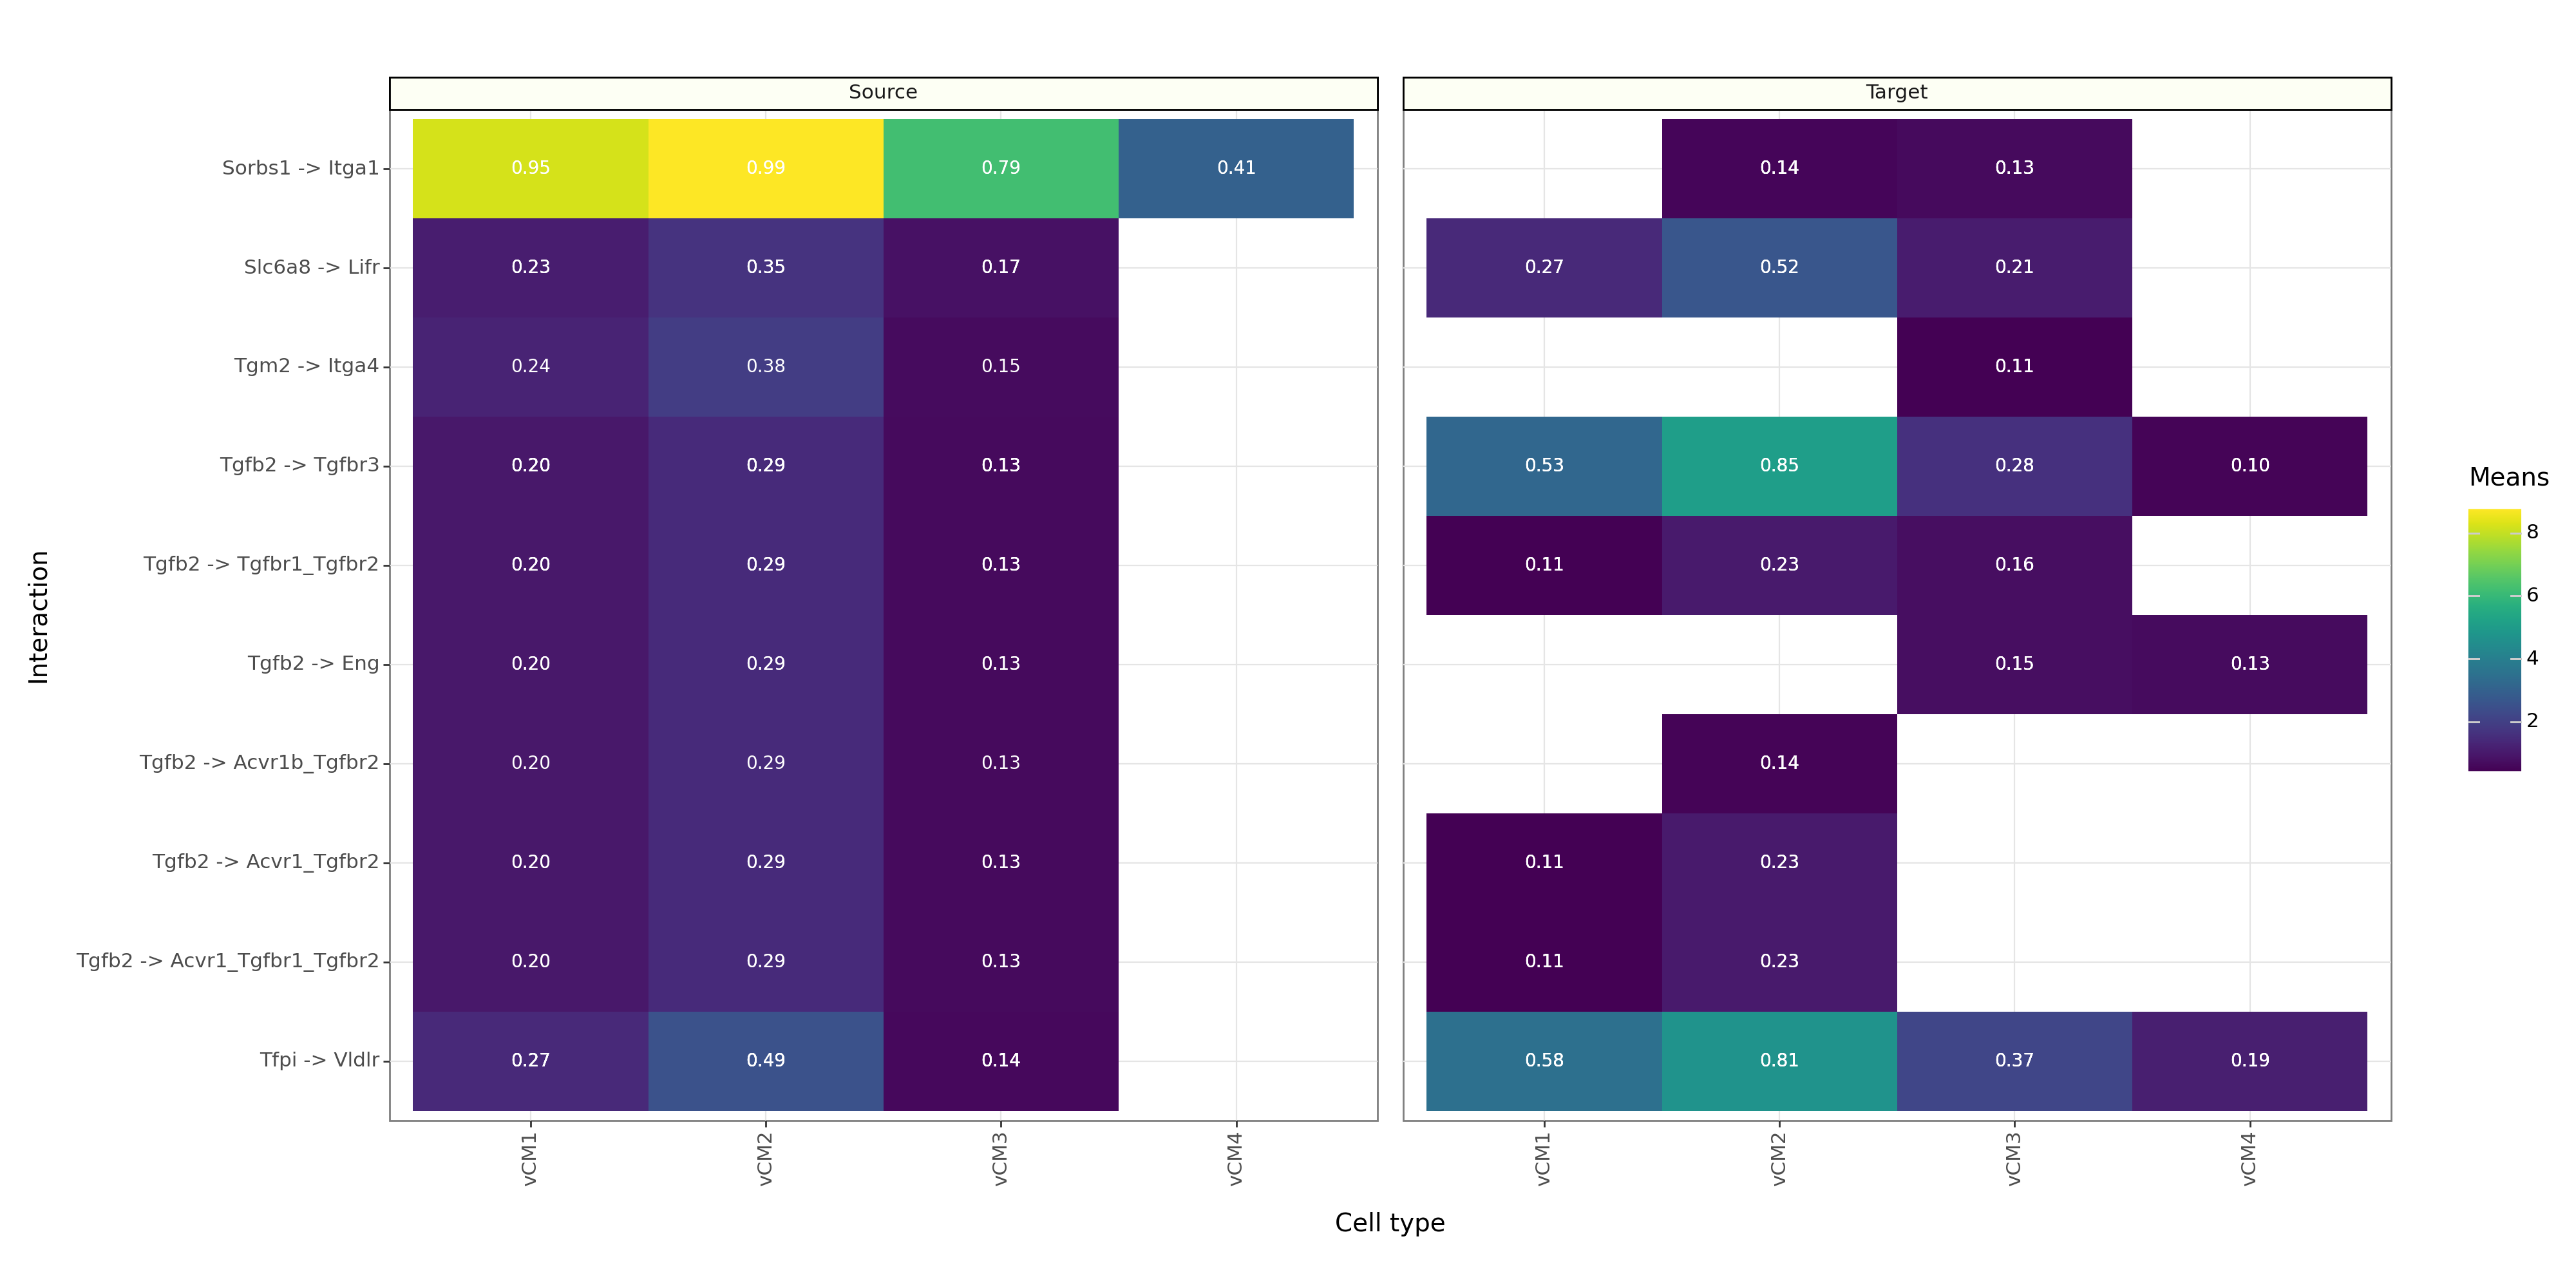

<Figure Size: (2000 x 1000)>

In [11]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill = 'means',
                         label = 'props',
                         label_fun = lambda x: f'{x:.2f}',
                         top_n = 10,
                         orderby = 'cellphone_pvals',
                         orderby_ascending = True,
                         figure_size = (20, 10),
                         source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         uns_key = 'cpdb_res'
                         )
my_plot

### Run `cellchat` for trial

In [12]:
cellchat(adata, groupby = 'C_scANVI', 
            expr_prop = 0.1, 
            resource_name = 'mouseconsensus', 
            verbose = True, 
            key_added = 'ccdb_res',
            use_raw = False)
adata.uns['ccdb_res'].head()

Using `.X`!
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
8059 features of mat are empty, they will be removed.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 8257 samples and 24226 features


100%|██████████| 1000/1000 [01:32<00:00, 10.82it/s]


ligand ligand_complex  ligand_props  ligand_trimean    mat_max receptor  \
1025  Fgf13          Fgf13      0.985012        0.592471  14.700395    Fgfr2   
273   Fgf13          Fgf13      0.985012        0.592471  14.700395    Fgfr2   
767   Fgf13          Fgf13      0.873765        0.567307  14.700395    Fgfr2   
95    Fgf13          Fgf13      0.873765        0.567307  14.700395    Fgfr2   
1046  Fgf13          Fgf13      0.985012        0.592471  14.700395    Scn5a   

     receptor_complex  receptor_props  receptor_trimean source target  \
1025            Fgfr2        0.982572          0.491819   vCM2   vCM2   
273             Fgfr2        0.854738          0.490264   vCM2   vCM1   
767             Fgfr2        0.982572          0.491819   vCM1   vCM2   
95              Fgfr2        0.854738          0.490264   vCM1   vCM1   
1046            Scn5a        0.922621          0.443726   vCM2   vCM2   

      lr_probs  cellchat_pvals  
1025  0.368199             0.0  
273   0.367463             0.0  
767   0.358162             0.0  
95    0.357434             0.0  
1046  0.344602             0.0

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


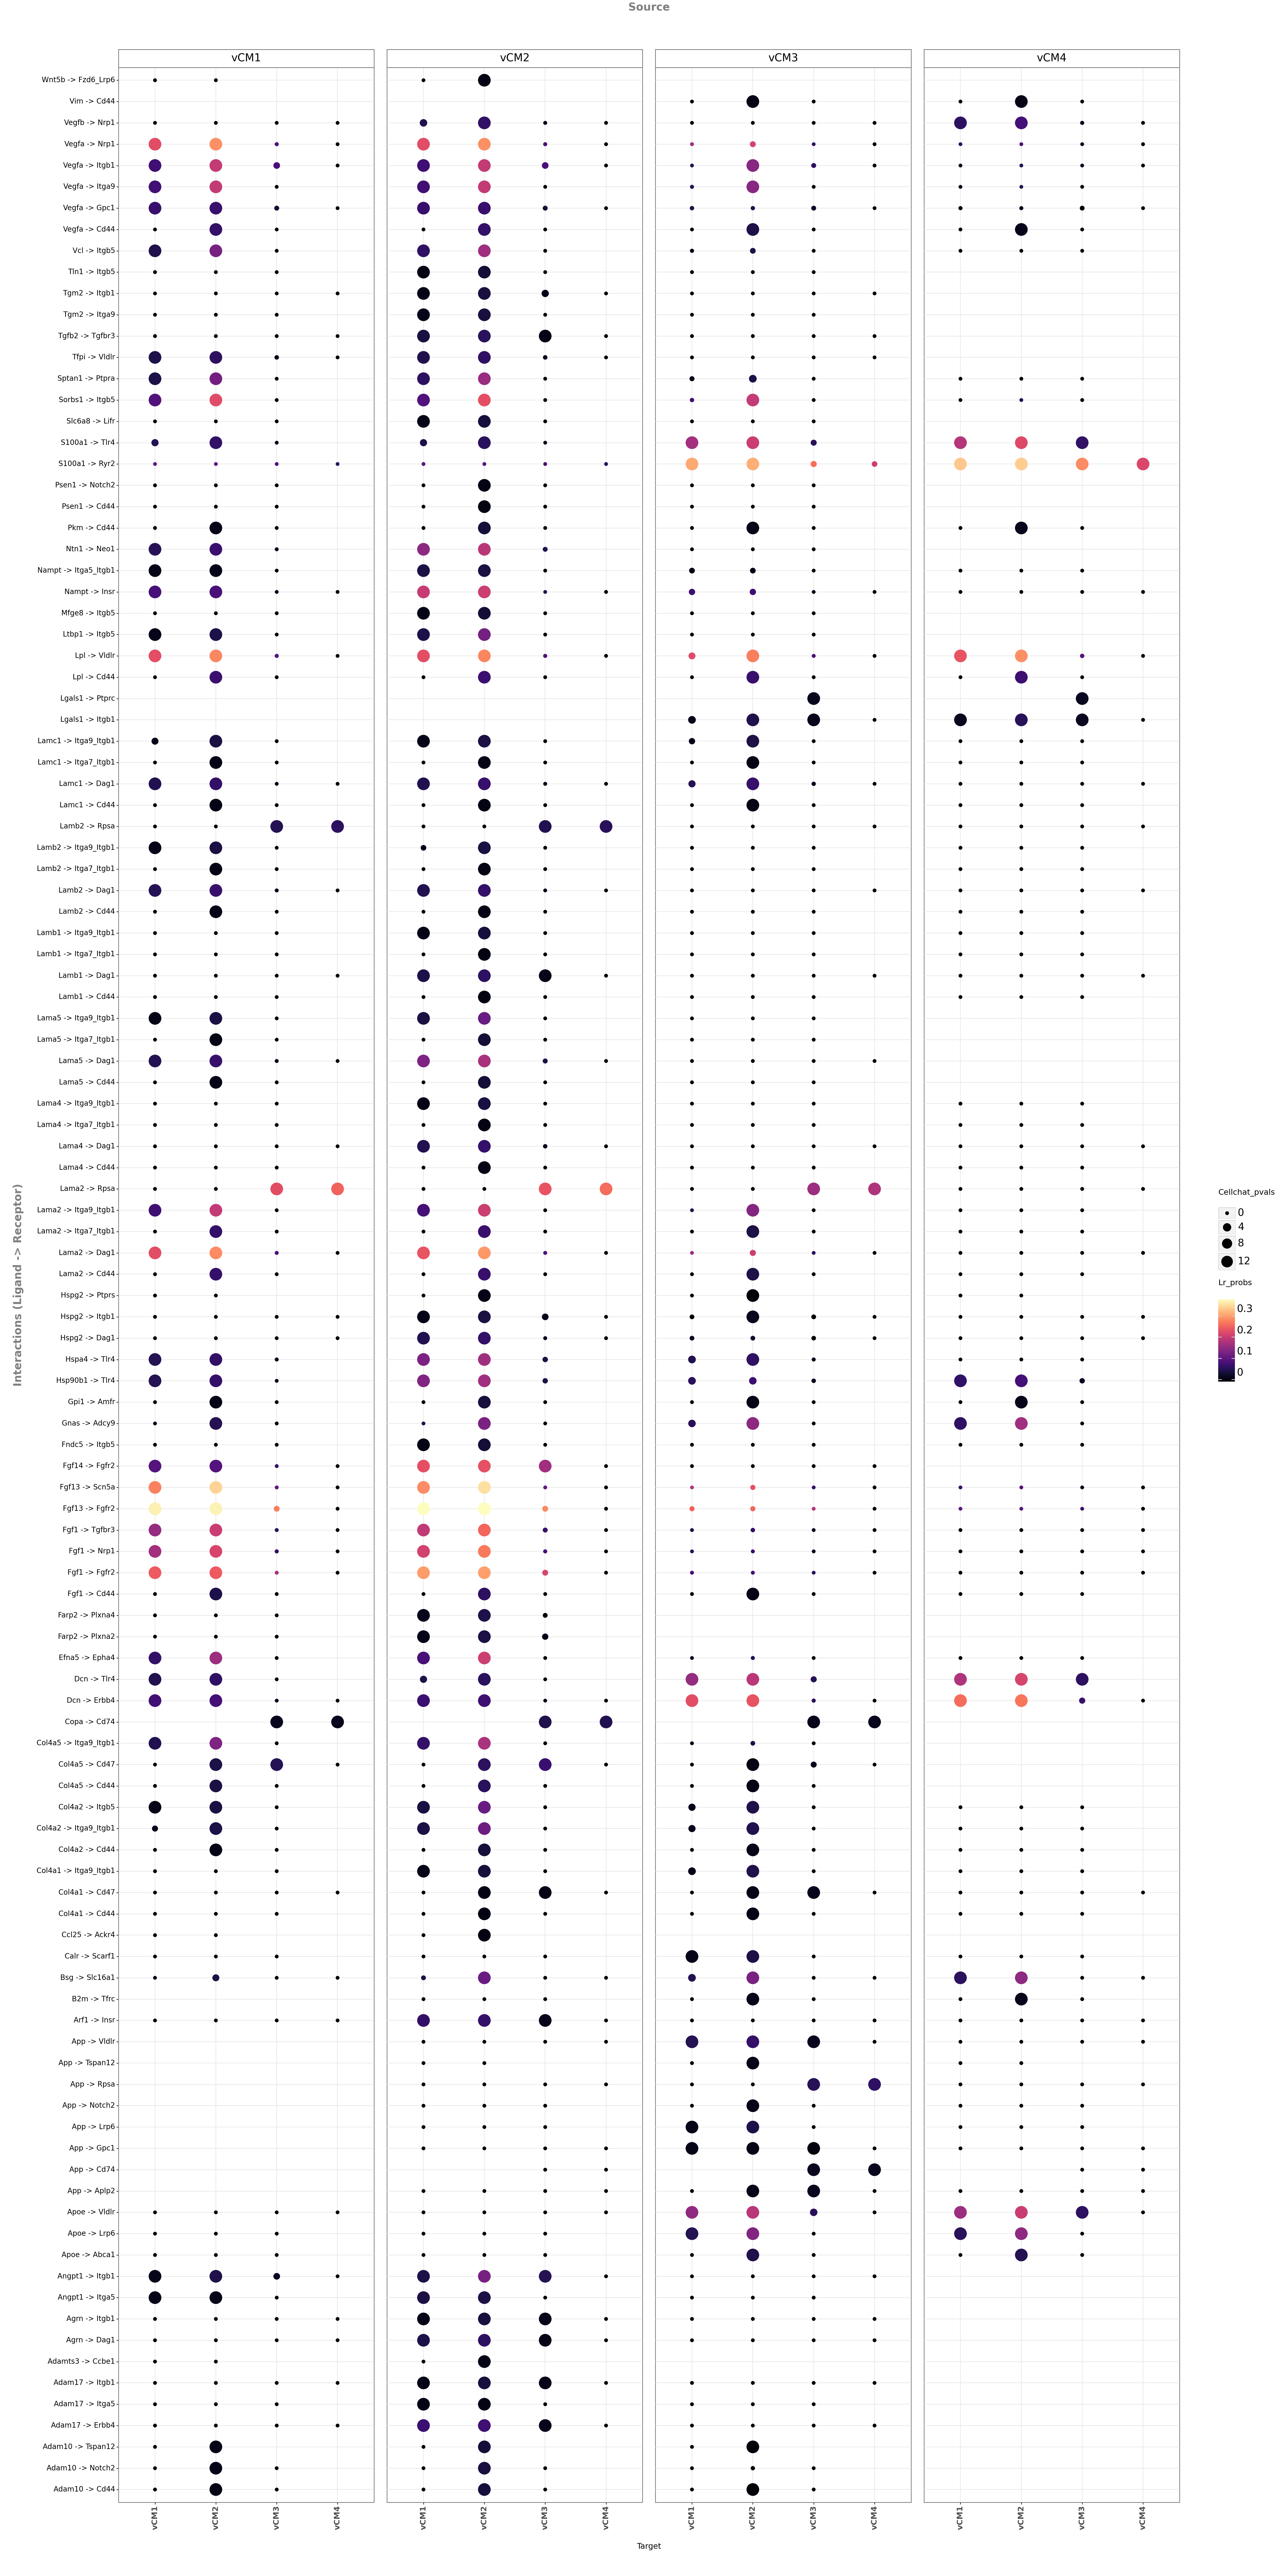

<Figure Size: (2500 x 5000)>

In [15]:
li.pl.dotplot(adata = adata,
              colour = 'lr_probs',
              size = 'cellchat_pvals',
              inverse_size = True, 
              source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              figure_size = (25, 50),
              filter_fun = lambda x: x['cellchat_pvals'] <= 0.05,
              uns_key = 'ccdb_res',
              cmap = 'magma'
             )

/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


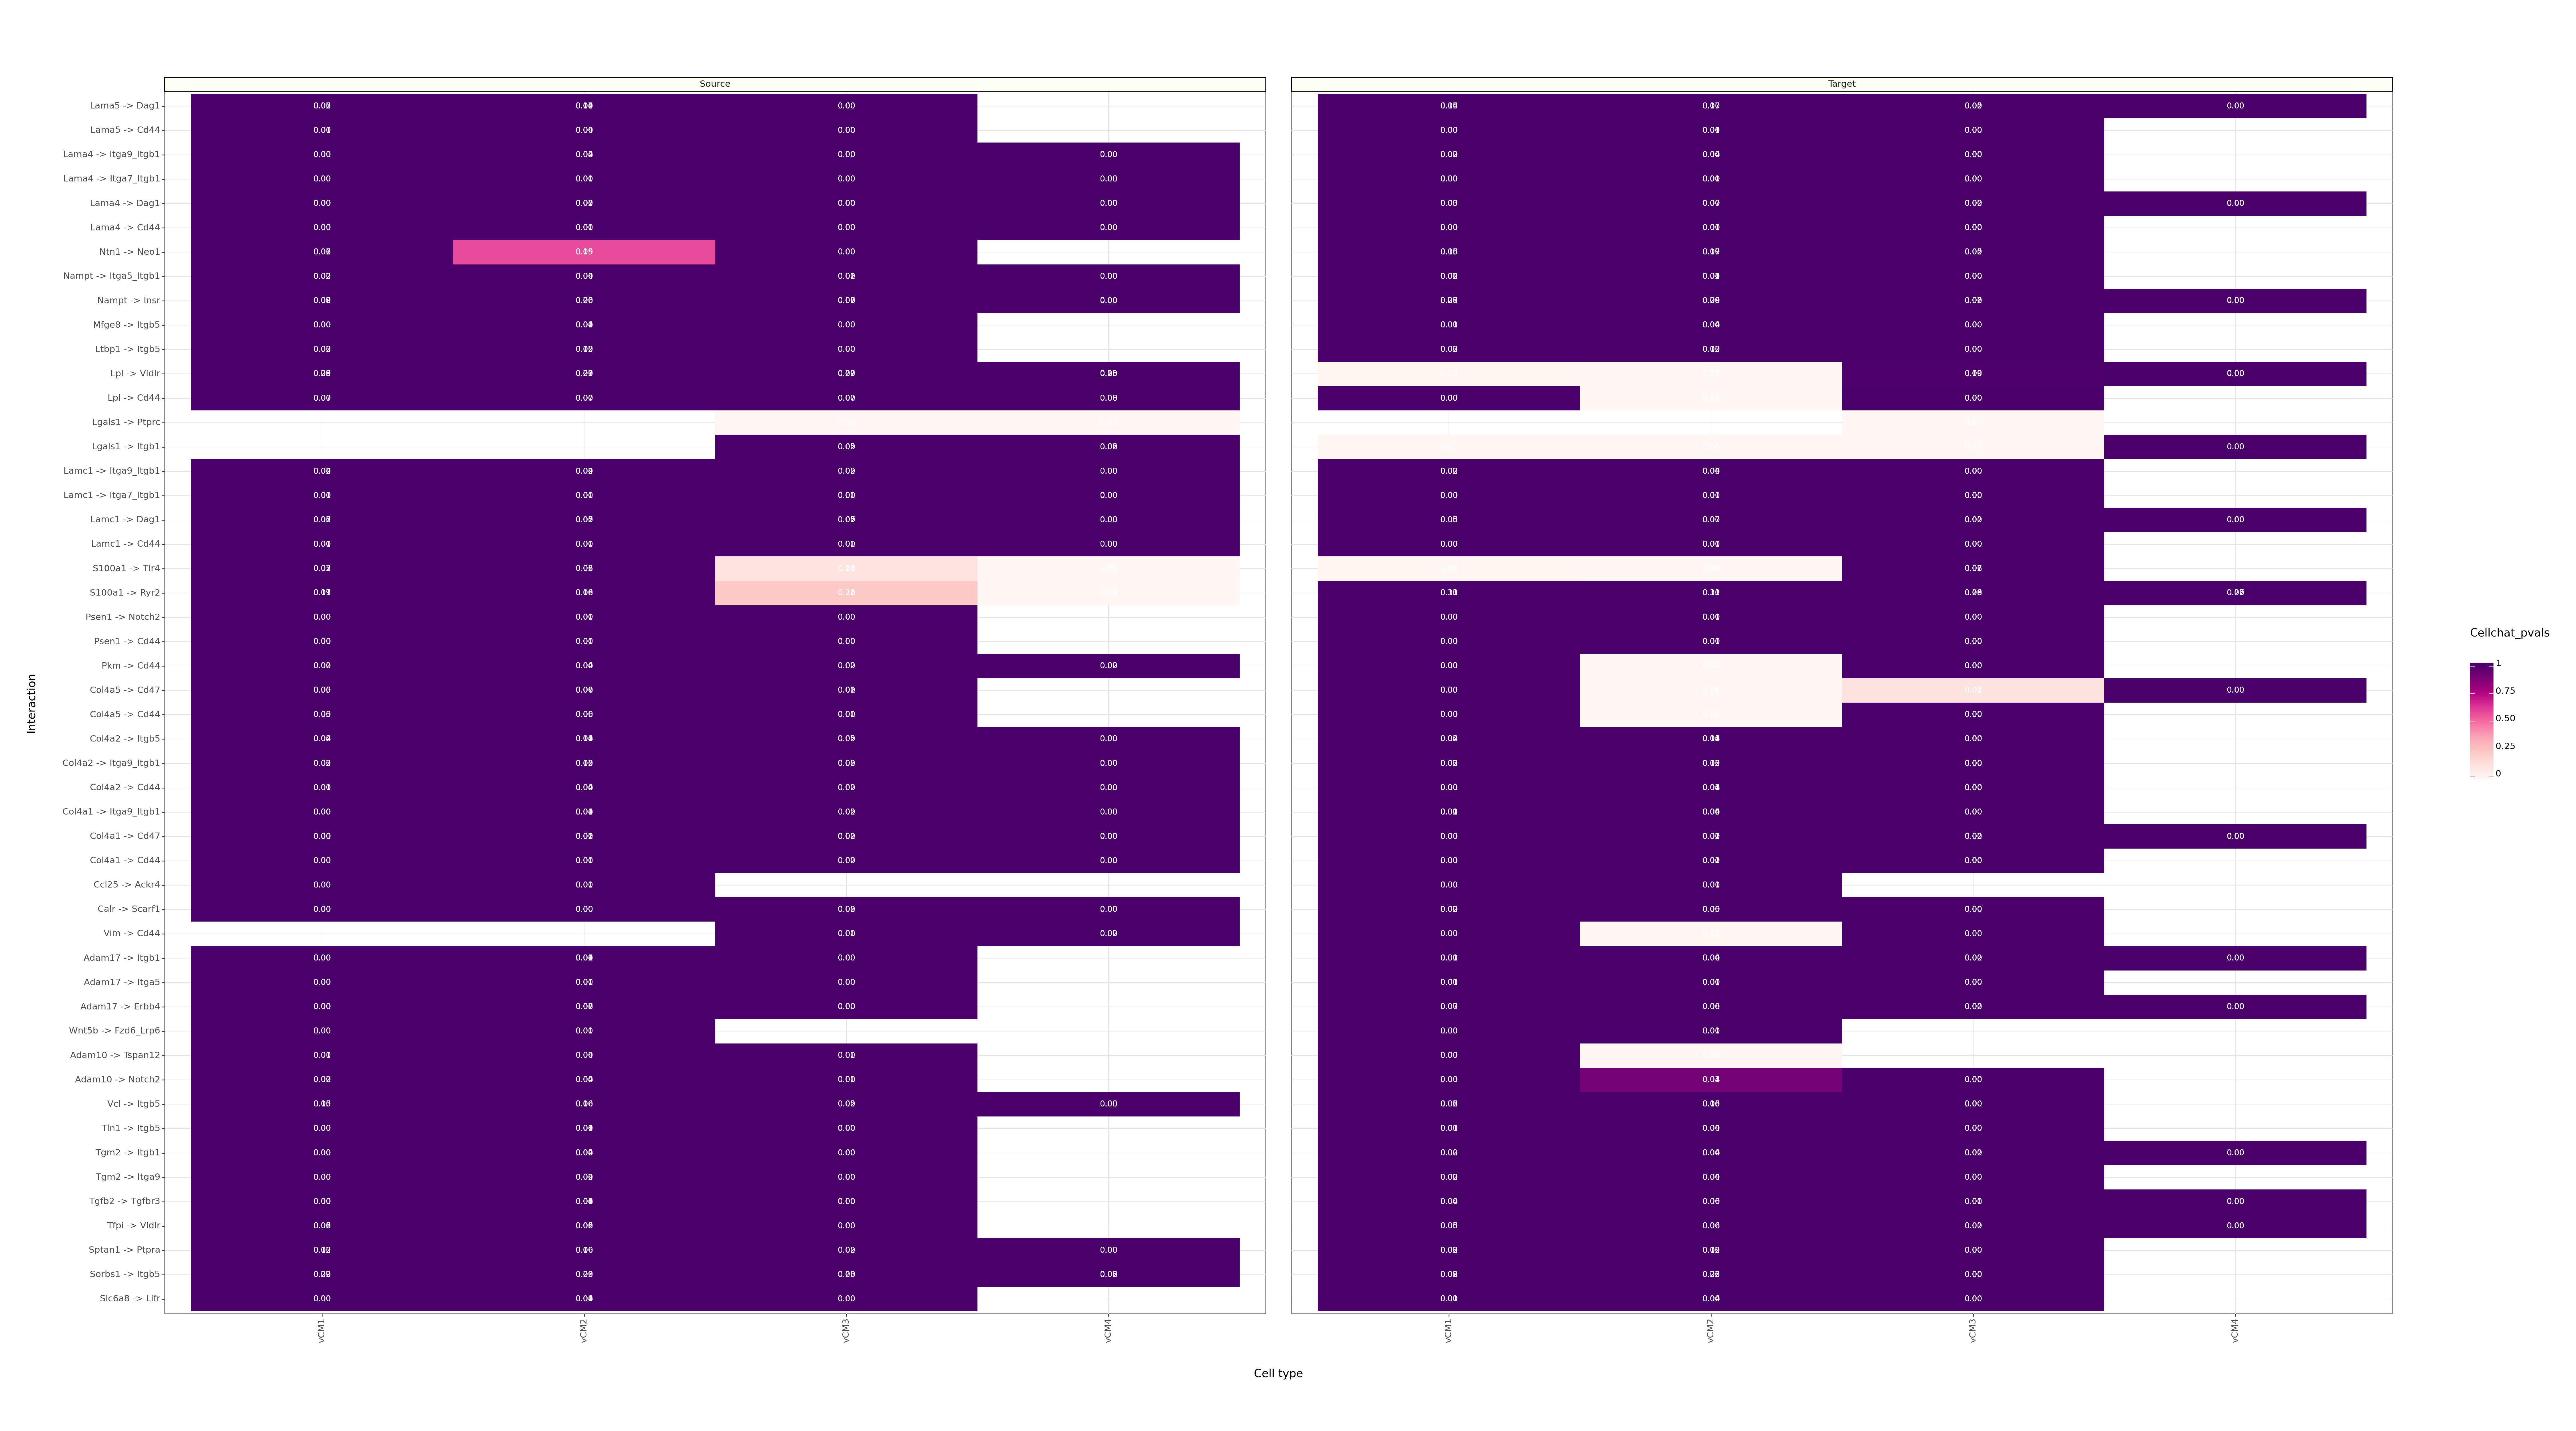

<Figure Size: (4500 x 2500)>

In [29]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill = 'cellchat_pvals',
                         label = 'lr_probs',
                         label_fun = lambda x: f'{x:.2f}',
                         top_n = 50,
                         orderby = 'cellchat_pvals',
                         orderby_ascending = True,
                         figure_size = (45, 25),
                         source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         uns_key = 'ccdb_res',
                         cmap = 'RdPu'
                         )
my_plot

### Run aggregated estimate 

In [32]:
li.mt.rank_aggregate(adata, 
                     groupby = 'C_scANVI', 
                     expr_prop = 0.1, 
                     verbose = True, 
                     use_raw = False,
                     resource_name = 'mouseconsensus')
adata.uns['liana_res'].head()

Using `.X`!
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
8059 features of mat are empty, they will be removed.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 8257 samples and 24226 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
Assuming that counts were `natural` log-normalized!


In [ ]:
rank_aggregate.describe()